# 10.2  XGBoost算法案例实战1 - 金融反欺诈模型

**10.2.1 案例背景**

信用卡盗刷一般发生在持卡人信息被不法分子窃取后复制卡片进行消费或信用卡被他人冒领后激活消费的情况。一旦发生信用卡盗刷，持卡人和银行都会蒙受一定的经济损失。因此，通过大数据搭建金融反欺诈模型对银行来说尤为重要。

**10.2.2 模型搭建**

1.读取数据

In [5]:
import pandas as pd
df = pd.read_excel('信用卡交易数据.xlsx')
df.head()

,换设备次数,支付失败次数,换IP次数,换IP国次数,交易金额,欺诈标签
0,0,11,3,5,28836,1
1,5,6,1,4,21966,1
2,6,2,0,0,18199,1
3,5,8,2,2,24803,1
4,7,10,5,0,26277,1


2.提取特征变量和目标变量

In [6]:
# 通过如下代码将特征变量和目标变量单独提取出来，代码如下：
X = df.drop(columns='欺诈标签') 
y = df['欺诈标签']

3.划分训练集和测试集

In [7]:
# 提取完特征变量后，通过如下代码将数据拆分为训练集及测试集：
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

4.模型训练及搭建

In [8]:
# 划分为训练集和测试集之后，就可以引入XGBoost分类器进行模型训练了，代码如下：
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, learning_rate=0.05)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**10.2.3 模型预测及评估**

In [9]:
# 模型搭建完毕后，通过如下代码预测测试集数据：
y_pred = clf.predict(X_test)

y_pred  # 打印预测结果

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1], dtype=int64)

In [10]:
# 通过和之前章节类似的代码，我们可以将预测值和实际值进行对比：
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,0,1
1,1,1
2,1,1
3,0,0
4,0,1


In [11]:
# 可以看到此时前五项的预测准确度为60%，如果想看所有测试集数据的预测准确度，可以使用如下代码：
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.875

In [12]:
# 我们还可以通过XGBClassifier()自带的score()函数来查看模型预测的准确度评分，代码如下，获得的结果同样是0.875。
clf.score(X_test, y_test)

0.875

In [13]:
# XGBClassifier分类器本质预测的并不是准确的0或1的分类，而是预测其属于某一分类的概率，可以通过predict_proba()函数查看预测属于各个分类的概率，代码如下：
y_pred_proba = clf.predict_proba(X_test)
print(y_pred_proba[0:5])  # 查看前5个预测的概率

[[0.8265032  0.1734968 ]
 [0.02098632 0.9790137 ]
 [0.0084281  0.9915719 ]
 [0.8999369  0.1000631 ]
 [0.8290514  0.17094862]]


In [14]:
# 此时的y_pred_proba是个二维数组，其中第一列为分类为0（也即非欺诈）的概率，第二列为分类为1（也即欺诈）的概率，因此如果想查看欺诈（分类为1）的概率，可采用如下代码：
# y_pred_proba[:,1]  # 分类为1的概率

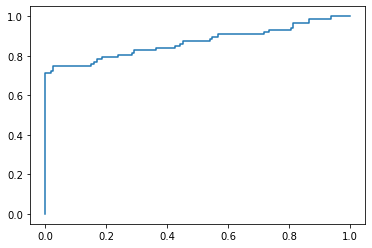

In [15]:
# 下面我们利用4.3节相关代码绘制ROC曲线来评估模型预测的效果：
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [16]:
# 通过如下代码求出模型的AUC值：
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])

score

0.8684772657918828

In [17]:
# 我们可以通过查看各个特征的特征重要性(feature importance)来得出信用卡欺诈行为判断中最重要的特征变量：
clf.feature_importances_

array([0.40674368, 0.1901846 , 0.04100984, 0.33347666, 0.02858528],
      dtype=float32)

In [18]:
# 通过如下5.2.2节特征重要性相关知识点进行整理，方便结果呈现，代码如下：
features = X.columns  # 获取特征名称
importances = clf.feature_importances_  # 获取特征重要性

# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
0,换设备次数,0.406744
3,换IP国次数,0.333477
1,支付失败次数,0.190185
2,换IP次数,0.041010
4,交易金额,0.028585


**10.2.4 模型参数调优**

In [19]:
from sklearn.model_selection import GridSearchCV  
parameters = {'max_depth': [1, 3, 5], 'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}  # 指定模型中参数的范围
clf = XGBClassifier()  # 构建模型
grid_search = GridSearchCV(clf, parameters, scoring='roc_auc', cv=5)  

In [20]:
# 下面我们将数据传入网格搜索模型并输出参数最优值：
grid_search.fit(X_train, y_train)  # 传入数据
grid_search.best_params_  # 输出参数的最优值

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}

In [21]:
# 下面我们根据新的参数建模，首先重新搭建XGBoost分类器，并将训练集数据传入其中：
clf = XGBClassifier(max_depth=1, n_estimators=100, learning_rate=0.05)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# 因为我们是通过ROC曲线的AUC评分作为模型评价准则来进行参数调优的，因此通过如下代码我们来查看新的AUC值：
y_pred_proba = clf.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.8563218390804598


将获得的AUC评分打印出来为：0.856，比原来没有调参前的0.866还略微低了些，有的读者可能会奇怪为什么调参后的结果还不如未调参时的结果，通常来说参数调优出现这种情况的概率较小，这里出现了也正好给大家解释下出现这种情况的原因。

出现这种情况的原因是因为交叉验证，我们来简单回顾下5.3节K折交叉验证的思路：它是将原来的测试数据分为K份（这里cv=5，即5份），然后在这K份数据中，选K-1份作为训练数据，剩下的1份作为测试数据，训练K次，获得K个的ROC曲线下的AUC值，然后将K个AUC值取平均，取AUC值的均值为最大情况下的参数为模型的最优参数。注意这里AUC值的获取是基于训练集数据，只不过是将训练集数据中的1/K作为测试集数据，这里的测试集数据并不是真正的测试集数据y_test，这也是为什么参数调优后结果反而不如不调优的结果的原因。实际应用中，通常不太会出现调参结果不如不调参的结果，出现这种情况某种程度也是因为数据量较小的原因（像本案例为1000条数据）。其他关于参数调优的其他一些注意点请参考5.3节，这里不再赘述。